# Import Library

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats as stats

# Load Data

In [11]:
data = pd.read_csv('/content/StudentData.csv')

print('----- data head -----')
print(data.head())
print('----- data description -----')
print(data.describe())


----- data head -----
    id  num_awards  prog  math
0   45           0     3    41
1  108           0     1    41
2   15           0     3    44
3   67           0     3    42
4  153           0     3    40
----- data description -----
               id  num_awards        prog        math
count  200.000000  200.000000  200.000000  200.000000
mean   100.500000    0.630000    2.025000   52.645000
std     57.879185    1.052921    0.690477    9.368448
min      1.000000    0.000000    1.000000   33.000000
25%     50.750000    0.000000    2.000000   45.000000
50%    100.500000    0.000000    2.000000   52.000000
75%    150.250000    1.000000    2.250000   59.000000
max    200.000000    6.000000    3.000000   75.000000


# Plotting Histogram

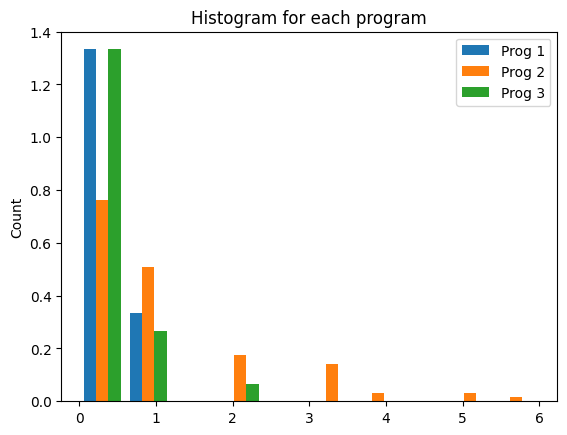

In [13]:
histData = []
uniqProgs = sorted(data['prog'].unique())
for elem in uniqProgs:
    histData.append(data[data['prog'] == elem]['num_awards'].values)

# Plotting histogram to see the distribution
plt.hist(histData, bins=10, density=True, histtype='bar', label=['Prog ' + str(x) for x in uniqProgs])
plt.legend()
plt.ylabel('Count')
plt.title('Histogram for each program')
plt.show()

# Analisis Pendugaan Parameter Regresi Poisson Menggunakan Data Kategorik

In [14]:
# Dummy variables untuk data kategorikal 'prog'
prog_dummies = pd.get_dummies(data['prog'], prefix='prog')
data = pd.concat([data, prog_dummies], axis=1)
data.drop(['prog', 'prog_3'], inplace=True, axis=1)
data = data.applymap(int)

print(data.head())

# Aplikasi regresi Poisson
feat_cols = ['math', 'prog_1', 'prog_2']
X = data[feat_cols].values
X = sm.add_constant(X, prepend=False)
Y = data['num_awards'].values

# Membangun model Poisson
poisson_mod = sm.Poisson(Y, X)
poisson_res = poisson_mod.fit(method="newton")
print(poisson_res.summary())

# Menghitung Pearson Chi-Square
pearson_chi2 = np.sum(((Y - poisson_res.fittedvalues) ** 2) / poisson_res.fittedvalues)
print('Pearson Chi2:', pearson_chi2)

# Menghitung deviance
deviance = 2 * (poisson_res.llnull - poisson_res.llf)
print('Deviance:', deviance)

# Derajat bebas (df)
df = data.shape[0] - len(poisson_res.params)
print('Degrees of Freedom:', df)

# Overdispersi Deteksi
pearson_chi2_dispersion = pearson_chi2 / df
deviance_dispersion = deviance / df
print('Pearson Chi2 Dispersion:', pearson_chi2_dispersion)
print('Deviance Dispersion:', deviance_dispersion)

# Menentukan Overdispersi
if pearson_chi2_dispersion > 1 or deviance_dispersion > 1:
    print('Data mengalami overdispersi.')
else:
    print('Data tidak mengalami overdispersi.')

    id  num_awards  math  prog_1  prog_2
0   45           0    41       0       0
1  108           0    41       1       0
2   15           0    44       0       0
3   67           0    42       0       0
4  153           0    40       0       0
Optimization terminated successfully.
         Current function value: 0.913761
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                  200
Model:                        Poisson   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:                  0.2118
Time:                        21:40:36   Log-Likelihood:                -182.75
converged:                       True   LL-Null:                       -231.86
Covariance Type:            nonrobust   LLR p-value:                 3.747e-21
                 coe

# Interpretasi Model Regresi Poisson

In [15]:
# Interpretation of the Poisson regression model
print(poisson_res.summary())

                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                  200
Model:                        Poisson   Df Residuals:                      196
Method:                           MLE   Df Model:                            3
Date:                Fri, 21 Jun 2024   Pseudo R-squ.:                  0.2118
Time:                        21:40:47   Log-Likelihood:                -182.75
converged:                       True   LL-Null:                       -231.86
Covariance Type:            nonrobust   LLR p-value:                 3.747e-21
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0702      0.011      6.619      0.000       0.049       0.091
x2            -0.3698      0.441     -0.838      0.402      -1.234       0.495
x3             0.7140      0.320      2.231      0.0

# Pengujian Model

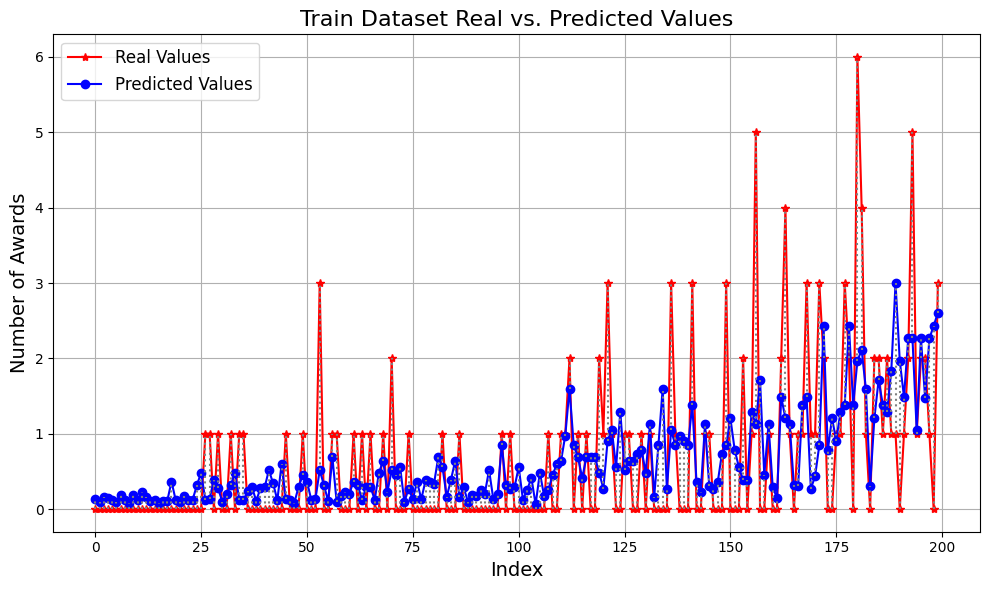

In [16]:
# Testing the model
predVals = poisson_res.predict(X)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility

plt.plot(range(len(Y)), Y, 'r*-', label='Real Values')  # Real values with red star markers
plt.plot(range(len(Y)), predVals, 'bo-', label='Predicted Values')  # Predicted values with blue circle markers

plt.title('Train Dataset Real vs. Predicted Values', fontsize=16)  # Larger title font size
plt.xlabel('Index', fontsize=14)  # Adding label for x-axis with larger font size
plt.ylabel('Number of Awards', fontsize=14)  # Adding label for y-axis with larger font size

plt.legend(fontsize=12)  # Larger legend font size
plt.grid(True)  # Adding grid for better readability

# Highlighting the difference between real and predicted values
for i in range(len(Y)):
    plt.vlines(x=i, ymin=min(Y[i], predVals[i]), ymax=max(Y[i], predVals[i]), color='gray', linestyle='dotted')

plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()
